In [43]:
import requests
import bs4
import os
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib as plt

# Create a directory for NLTK data if it doesn't exist
nltk_data_dir = os.path.join(os.path.expanduser("~"), "nltk_data")
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Append this directory to NLTK data path
nltk.data.path.append(nltk_data_dir)

# Download the resources again
nltk.download('punkt')
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)

Pride_and_prejudice_book_info_page_url = 'https://www.gutenberg.org/ebooks/1342'
Gutenberg_home_page_url = 'https://www.gutenberg.org'

if not os.path.exists("downloaded_books"):
    os.makedirs("downloaded_books")

lemmatizer = WordNetLemmatizer()

def getpagetext(parsedpage):
    scriptelements=parsedpage.find_all('script')
    for scriptelement in scriptelements:
        scriptelement.extract()
    pagetext=parsedpage.get_text()
    return pagetext

def parse_webpage(url):
    try:
        response=requests.get(url, timeout=10)
        response.raise_for_status()
        parsed_html=bs4.BeautifulSoup(response.content,'html.parser')
        return parsed_html
    except requests.exceptions.RequestException as e:
        print(f"Error fetcing {url}: {e}" )
        return None

def extract_actual_book_content(read_online_url, book_title):
    parsed_html = parse_webpage(read_online_url)
    if parsed_html is None:
        return ""
    full_text = getpagetext(parsed_html)
    HEADER_TEXT_MARKER = "*** START OF THE PROJECT GUTENBERG EBOOK " + book_title.upper() + " ***"
    FOOTER_TEXT_MARKER = "*** END OF THE PROJECT GUTENBERG EBOOK " + book_title.upper() + " ***"
    start_index = full_text.find(HEADER_TEXT_MARKER) + len(HEADER_TEXT_MARKER)
    end_index = full_text.find(FOOTER_TEXT_MARKER)
    return full_text[start_index:end_index].strip()

def save_text_to_file(author, title, content):
    clean_title = ''.join(c for c in title if c.isalnum() or c.isspace()).replace(' ', '_')
    file_path = os.path.join("downloaded_books", f"{clean_title}.txt")

    try:
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(content)
        print(f"saved {title} by {author} to {file_path}")
    except OSError as e:
        print(f"Error saving {title} by {author} to {file_path}: {e}")

[nltk_data] Downloading package punkt to C:\Users\EmmaK/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\EmmaK\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EmmaK\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def crawl_ebook(author, title):
    parsed_html = parse_webpage(Pride_and_prejudice_book_info_page_url)

    read_online_link = parsed_html.find('a', title='Read online')['href']
    actual_content = extract_actual_book_content(Gutenberg_home_page_url + read_online_link, title)
    save_text_to_file(author, title, actual_content)

crawl_ebook("Jane Austen", "Pride and Prejudice")

saved Pride and Prejudice by Jane Austen to downloaded_books\Pride_and_Prejudice.txt


In [45]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]  # Ignore punctuation
    return lemmatized_tokens

def process_book(file_path):
    """
    Process a specific book file and return its lemmatized tokens.

    :param file_path: The path to the book file
    :type file_path: str
    :return: List of lemmatized tokens from the book
    :rtype: list
    """
    unified_tokens = []  
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read().lower()
            lemmatized_tokens = tokenize_and_lemmatize(text)
            unified_tokens.extend(lemmatized_tokens)
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
    except OSError as e:
        print(f"Error reading {file_path}: {e}")

    return unified_tokens

# Process the books and create a unified vocabulary

file_to_process = ".\downloaded_books\Pride_and_Prejudice.txt"  # Specify the path to the specific book
lemmatized_tokens = process_book(file_to_process)

<Axes: title={'center': 'Lexical Dispersion Plot, the names of places'}, xlabel='Word Offset'>

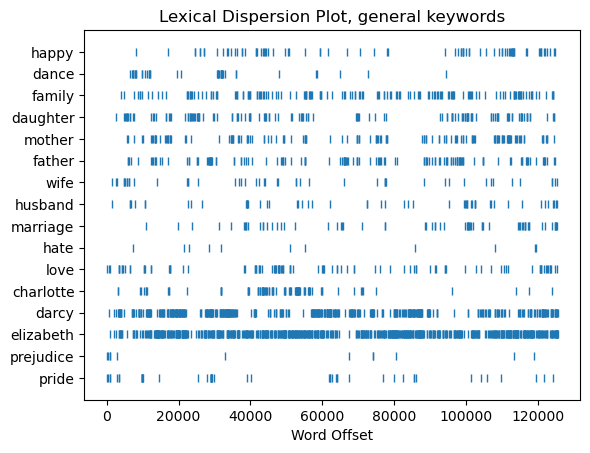

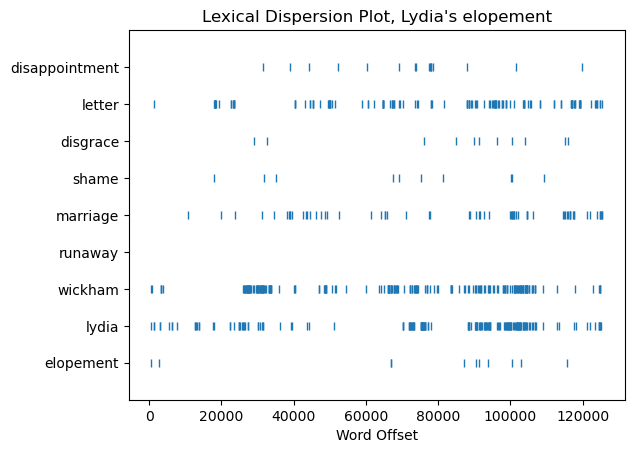

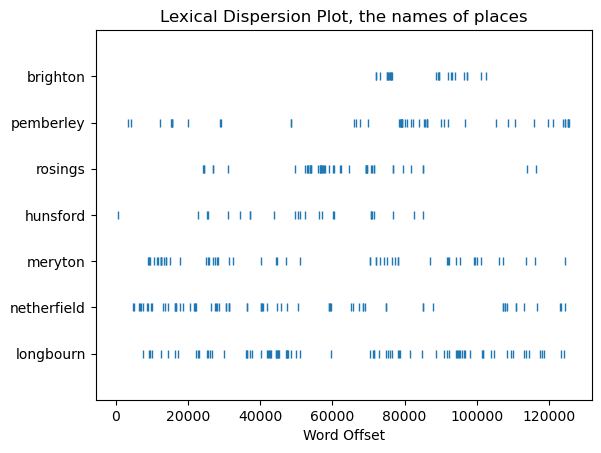

In [46]:
target_words = ['pride', 'prejudice', 'elizabeth', 'darcy', 'charlotte', 'love', 'hate', 'marriage', 'husband', 'wife', 'father', 'mother', 'daughter', 'family', 'dance', 'happy']
nltk.draw.dispersion_plot(lemmatized_tokens, target_words, title="Lexical Dispersion Plot, general keywords")

target_words = ['elopement', 'lydia', 'wickham', 'runaway', 'marriage', 'shame', 'disgrace', 'letter', 'disappointment']
nltk.draw.dispersion_plot(lemmatized_tokens, target_words, title="Lexical Dispersion Plot, Lydia's elopement")

target_words = ['longbourn', 'netherfield', 'meryton', 'hunsford', 'rosings', 'pemberley', 'brighton']
nltk.draw.dispersion_plot(lemmatized_tokens, target_words, title="Lexical Dispersion Plot, the names of places")